# WeatherPy
----

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import json
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create the Base URL for the API Call
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Create lists to store the data as we're looping through the API calls
city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
lat = []
lng = []
max_temps = []
wind_speeds = []
count = 0
set_count = 1

# Begin Data Retrieval via For Loop where we make a call for each city
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        if count >= 50:
            set_count = set_count + 1
            count = 0
        count = count + 1
        response = requests.get(f'{base_url}{city}&appid={weather_api_key}').json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f'Processing Record {count} of Set {set_count} | {city}')
        city_names.append(city)
    except:
        print('City not found. Skipping...')
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | kropotkin
Processing Record 4 of Set 1 | sao jose da coroa grande
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | lourdes
Processing Record 8 of Set 1 | gorontalo
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | noumea
Processing Record 11 of Set 1 | tamandare
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | les cayes
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | alamosa
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 

Processing Record 3 of Set 5 | yekaterinoslavka
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | henties bay
Processing Record 6 of Set 5 | batasan
Processing Record 7 of Set 5 | taitung
Processing Record 8 of Set 5 | sabla
Processing Record 9 of Set 5 | sao felix do xingu
Processing Record 10 of Set 5 | kimbe
Processing Record 11 of Set 5 | nanakuli
Processing Record 12 of Set 5 | bathsheba
Processing Record 13 of Set 5 | cidreira
Processing Record 14 of Set 5 | naze
Processing Record 15 of Set 5 | san quintin
Processing Record 16 of Set 5 | lagoa
Processing Record 17 of Set 5 | grants pass
Processing Record 18 of Set 5 | grand-santi
Processing Record 19 of Set 5 | tumaco
Processing Record 20 of Set 5 | carutapera
Processing Record 21 of Set 5 | caconda
Processing Record 22 of Set 5 | ruteng
Processing Record 23 of Set 5 | pangody
Processing Record 24 of Set 5 | matagami
Processing Record 25 of Set 5 | vostok
Processing Record 26 of Set 5 | lasa
Processing Re

Processing Record 10 of Set 9 | ahipara
Processing Record 11 of Set 9 | axim
Processing Record 12 of Set 9 | cabinda
Processing Record 13 of Set 9 | acajutla
Processing Record 14 of Set 9 | cairo montenotte
Processing Record 15 of Set 9 | rizhao
Processing Record 16 of Set 9 | pisco
Processing Record 17 of Set 9 | presidencia roque saenz pena
City not found. Skipping...
Processing Record 19 of Set 9 | dawei
Processing Record 20 of Set 9 | saint anthony
Processing Record 21 of Set 9 | santa maria del oro
Processing Record 22 of Set 9 | havre-saint-pierre
Processing Record 23 of Set 9 | turan
Processing Record 24 of Set 9 | nishiwaki
Processing Record 25 of Set 9 | libertador general san martin
Processing Record 26 of Set 9 | saquena
Processing Record 27 of Set 9 | seydi
Processing Record 28 of Set 9 | shaoyang
Processing Record 29 of Set 9 | muravlenko
Processing Record 30 of Set 9 | mildura
Processing Record 31 of Set 9 | rosetta
Processing Record 32 of Set 9 | lipin bor
Processing Rec

Processing Record 10 of Set 13 | riyadh
Processing Record 11 of Set 13 | buchanan
Processing Record 12 of Set 13 | chicama
Processing Record 13 of Set 13 | amurzet
Processing Record 14 of Set 13 | alberton
Processing Record 15 of Set 13 | fare
Processing Record 16 of Set 13 | ko samui
Processing Record 17 of Set 13 | terrace bay
Processing Record 18 of Set 13 | yerbogachen
Processing Record 19 of Set 13 | sechura
Processing Record 20 of Set 13 | mangaratiba
Processing Record 21 of Set 13 | chihuahua
Processing Record 22 of Set 13 | bagdarin
Processing Record 23 of Set 13 | pando
Processing Record 24 of Set 13 | bosaso
Processing Record 25 of Set 13 | sinnamary
City not found. Skipping...
Processing Record 27 of Set 13 | craig
Processing Record 28 of Set 13 | tabuk
Processing Record 29 of Set 13 | belogorsk
Processing Record 30 of Set 13 | manokwari
Processing Record 31 of Set 13 | gobabis
Processing Record 32 of Set 13 | cap malheureux
Processing Record 33 of Set 13 | takoradi
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the Pandas Data Frame
weather_df = pd.DataFrame({
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
})

# Convert the Kelvin Temps to Farehneith
weather_df['Max Temp'] = weather_df['Max Temp'].apply(lambda x: (x-273.15)*9/5  + 32)

# Export data to CSV File
weather_df.to_csv(output_data_file, index=False, header=True)

In [5]:
# Display the Data Frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,75,TO,1584154254,83,-21.20,-175.20,80.600,6.70
1,qaqortoq,100,GL,1584154257,79,60.72,-46.03,21.200,1.50
2,kropotkin,35,RU,1584154330,69,45.44,40.58,52.160,3.70
3,sao jose da coroa grande,100,BR,1584154331,72,-8.90,-35.15,81.914,4.39
4,hithadhoo,20,MV,1584154253,58,-0.60,73.08,83.642,3.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
current_date = date.today()
current_date = current_date.strftime("%x")

#### Latitude vs. Temperature Plot

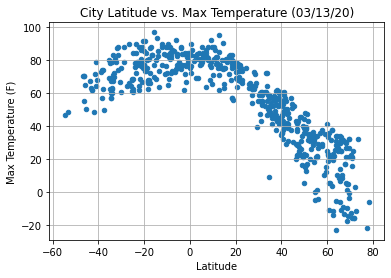

In [9]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True)
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/fig1.png")
plt.show()

<h6>Observation</h6>
<p>This graph shows us a genral trend of the highest max temperatures being around 0 latitude, also called the Prime Meridian. We can see that he further we get away from 0 latitude the lower the max temperature will be. There seems to be a correlation in two directions from the 0 point on the x axis.</p>

#### Latitude vs. Humidity Plot

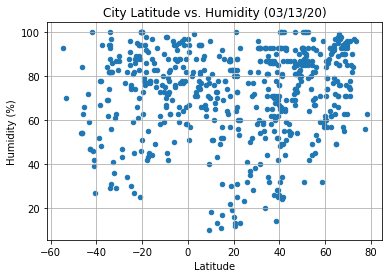

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True)
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/fig2.png")
plt.show()

<h6>Observation</h6>
<p>Humidity does not have the same type of distribution as temperature does related to latitude. You can find high and low humidity areas at all latitudes with very few exceptions. There seems to be little to no correlation.</p>

#### Latitude vs. Cloudiness Plot

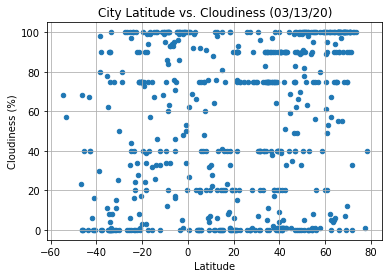

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True)
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/fig3.png")
plt.show()

<h6>Observation</h6>
<p>The distribution of cloudiness is very similar to humidity. It was very spread and shows an equal distribution across all almost all latitudes. There seems to be little to no correlation.</p>

#### Latitude vs. Wind Speed Plot

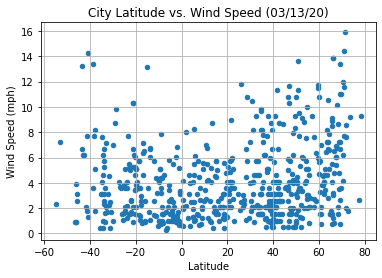

In [12]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True)
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/fig4.png")
plt.show()

<h6>Observation</h6>
<p>Once again, windspeed seems to be mostly consisten across all latitudes with little to no correlation. There are some strong outliers at the extreme negative and positive latitudes.</p>

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f'The r-squared is: {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    if rvalue < 0:
        plt.annotate(line_eq,((x_values.min()),(y_values.min())),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,((x_values.median()),(y_values.min())),fontsize=15,color="red")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = weather_df.loc[weather_df['Lat'] >= 0, :]
southern_hem_df = weather_df.loc[weather_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8994748530924498


Text(0, 0.5, 'Max Temp')

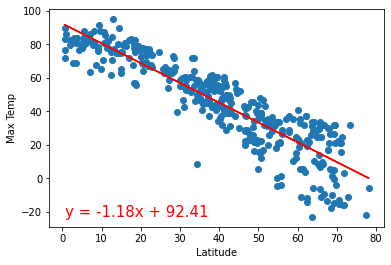

In [15]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

<h6>Linear Regression Analysis</h6>
<p>This graph shows that the northern hemisphere has a very strong correlation between temp and latitude. This reinforces our observation from the first plot an zooms in on a single hemisphere to show a correlation in only one direction.</p>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5416806491152475


Text(0, 0.5, 'Max Temp')

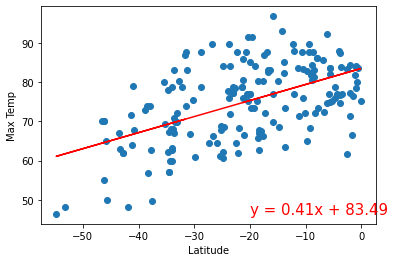

In [16]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

<h6>Linear Regression Analysis</h6>
<p>This correlatoin still exists in the hemisphere but isn't nearly as strong. We see a wider spread of temperature distribution.</p>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23282308728848036


Text(0, 0.5, 'Humidity')

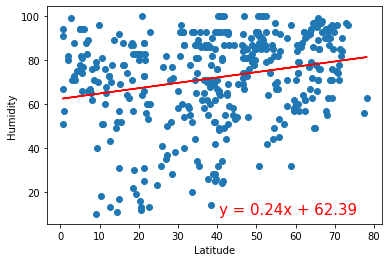

In [17]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

<h6>Linear Regression Analysis</h6>
<p>Much like our original humidty plot we see a very week to no correlation between humidity and latitude.</p>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2211731867186038


Text(0, 0.5, 'Humidity')

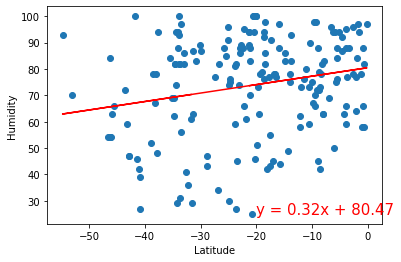

In [18]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

<h6>Linear Regression Analysis</h6>
<p>Much like our original humidty plot we see a very week to no correlation between humidity and latitude.</p>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3111472794998995


Text(0, 0.5, 'Cloudiness')

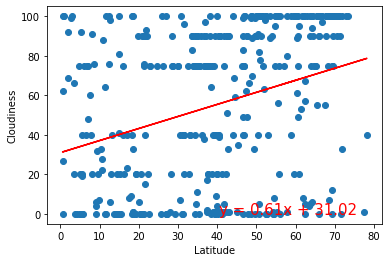

In [19]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

<h6>Linear Regression Analysis</h6>
<p>Much like our original cloudiness plot we see a very week to no correlation between cloudiness and latitude.</p>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.39492641370189524


Text(0, 0.5, 'Cloudiness')

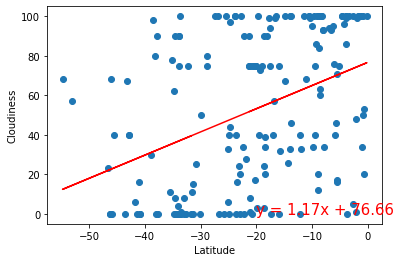

In [20]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

<h6>Linear Regression Analysis</h6>
<p>By zooming in on the negative latitudes we see a slightly strong, although, still very weak to no correlation between cloudiness and latitude.</p>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.3008008093794929


Text(0, 0.5, 'Wind Speed')

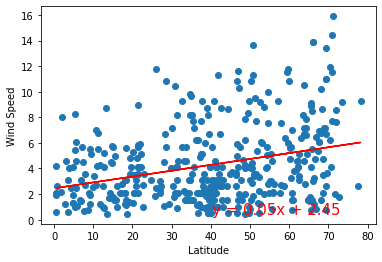

In [21]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

<h6>Linear Regression Analysis</h6>
<p>The plot of wind speed has a very high density in the minimum values but still shows a very weak to no correlation between latitude and wind speed. It seems that most of the correlation is impacted by a few extreme outliers at the max latitudes.</p>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2367970303597402


Text(0, 0.5, 'Wind Speed')

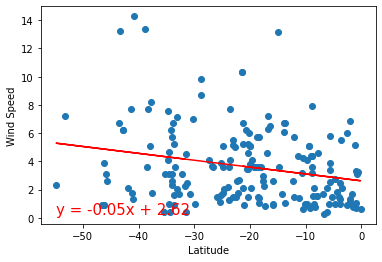

In [22]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

<h6>Linear Regression Analysis</h6>
<p>This plot of wind speed also has a very high density in the minimum values and still shows a very weak to no correlation between latitude and wind speed. It seems that most of the correlation is impacted by a few extreme outliers at the min latitudes.</p>